In [1]:
import pylyrics3 as pl
import poetrytools as pt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set()

In [3]:
def get_rhyme_ratio(poem):
    """
    Get the ratio of rhymes to total lines (total unique ending phonemes divided by total number of lines). 
    The bigger the number the more diverse the rhymescheme ie. the less rhymes per line.
    """
    
    total_rhyme = pt.rhyme_scheme(poem)
    while ' ' in total_rhyme: total_rhyme.remove(' ')
    unique_rhyme = set(total_rhyme)
    rhyme_ratio = len(unique_rhyme) / len(total_rhyme)
    return rhyme_ratio

In [4]:
artist = pl.get_artist_lyrics('broadcast', albums=True)

In [82]:
artist_albums = []
artist_songs = []
artist_lyrics = []
rhyme_ratios = []
rhyme_types = []
metres = []
word_frequency = []
year = []

In [83]:
for album in artist.items(): # Organize all songs and the albums they belong to for later use in Pandas DataFrame
    for song in album[1]:
        artist_albums.append(album[0]) # Get Album info
        artist_songs.append(song) # Get Song info

In [84]:
for album in artist.values(): # Get Lyrics for each song
    for lyrics in album.values():
        artist_lyrics.append(lyrics)

In [85]:
for lyric in artist_lyrics: # Get rhyme ratio of each song
    if type(lyric) == str:
        poem = pt.tokenize(lyric)
        poem = get_rhyme_ratio(poem)
    else:
        poem = None
    rhyme_ratios.append(poem)
    
for lyric in artist_lyrics: # Get rhyme type of each song
    if type(lyric) == str:
        poem = pt.tokenize(lyric)
        poem = pt.guess_rhyme_type(poem)[-1]
    else:
        poem = None
    rhyme_types.append(poem)

for lyric in artist_lyrics: # Get metre of each song
    if type(lyric) == str:
        poem = pt.tokenize(lyric)
        poem = pt.guess_metre(poem)[-1]
    else:
        poem = None
    metres.append(poem)

In [86]:
for lyric in artist_lyrics: # Get a dictionary of word frequency for each song
    word_count = {}
    if type(lyric) == str:
        lyric = lyric.lower()
        lyric = lyric.split()
        for word in set(lyric):
            word_count[word] = lyric.count(word)
        word_frequency.append(word_count)
    else:
        word_frequency.append(word_count)

In [87]:
for album in artist_albums:
    year.append(int(album[-5:-1]))

In [88]:
df = pd.DataFrame()


df['Album'] = artist_albums
df['Year'] = year
df['Song'] = artist_songs
df['Rhyme Type'] = rhyme_types
df['Rhyme Ratio'] = rhyme_ratios
df['Metre'] = metres
df['Word Frequency'] = word_frequency
df['Lyrics'] = artist_lyrics

In [89]:
df

,Album,Year,Song,Rhyme Type,Rhyme Ratio,Metre,Word Frequency,Lyrics
0,Work And Non Work (1997),1997,Accidentals,no rhyme,0.500000,trochaic tetrameter,"{'you': 1, 'my': 1, 'or': 1, 'sleep': 1, 'stra...",Under the strain something's got to break \n I...
1,Work And Non Work (1997),1997,The Book Lovers,rondeau rhyme,0.285714,trochaic tetrameter,"{'you': 4, 'like': 1, 'everyone': 3, 'anyone':...",Lines and lines \n Of the spines \n Coloured e...
2,Work And Non Work (1997),1997,Message From Home,alternate rhyme,0.333333,trochaic tetrameter,"{'mouth': 4, 'you': 7, 'my': 3, 'or': 1, 'know...",I hope that you kept the note \n That I left f...
3,Work And Non Work (1997),1997,Phantom,None,NaN,None,{},False
4,Work And Non Work (1997),1997,We've Got Time,shakespearean sonnet,0.320000,iambic trimeter,"{'you': 5, 'have': 3, 'something,': 1, 'lives'...","You and I \n Got something, why don't we try \..."
5,Work And Non Work (1997),1997,Living Room,limerick,0.352941,trochaic tetrameter,"{'you': 6, 'have': 1, 'so': 3, 'is': 1, 'do,':...",You can see in miniature \n Everything is so s...
6,Work And Non Work (1997),1997,According To No Plan,rondeau rhyme,0.375000,trochaic tetrameter,"{'we're': 1, 'our': 1, 'know': 1, 'something':...","Oh, and I found myself lost \n Looked but nowh..."
7,Work And Non Work (1997),1997,The World Backwards,alternate rhyme,0.400000,trochaic tetrameter,"{'what's': 2, 'my': 1, 'so': 1, 'know,': 1, 'a...","As we know, things aren't grow \n What's next ..."
8,Work And Non Work (1997),1997,Lights Out,enclosed rhyme,0.310345,iambic trimeter,"{'room's': 1, 'too': 2, 'my': 2, 'spacious': 1...",I'll show you for example \n A situation that'...
9,The Noise Made by People (2000),2000,Long Was The Year,no rhyme,0.333333,iambic trimeter,"{'you': 2, 'like': 3, 'know': 1, 'sleep': 1, '...","Long was the year, will you stay, now you're h..."


In [90]:
unique_albums = []
for i in artist_albums: # Make a list of all unique albums (for graphing in matplotlib)
    if i not in unique_albums:
        unique_albums.append(i)
    else:
        pass

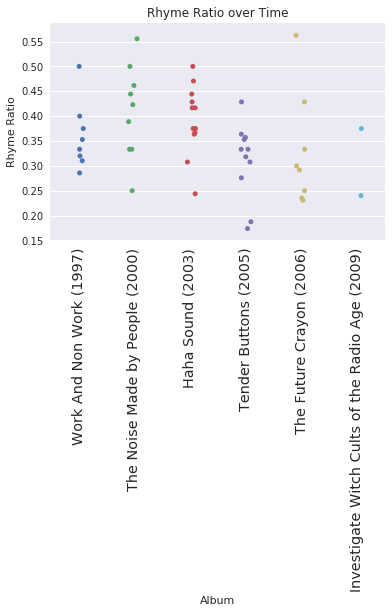

In [91]:
plt.xticks(rotation="vertical", size='large')
ax = sns.stripplot(x=df['Album'], y=df['Rhyme Ratio'], jitter=True)
ax.set_xlabel("Album")
ax.set_ylabel("Rhyme Ratio")
ax.set_title('Rhyme Ratio over Time')

plt.show()

/home/garrett/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


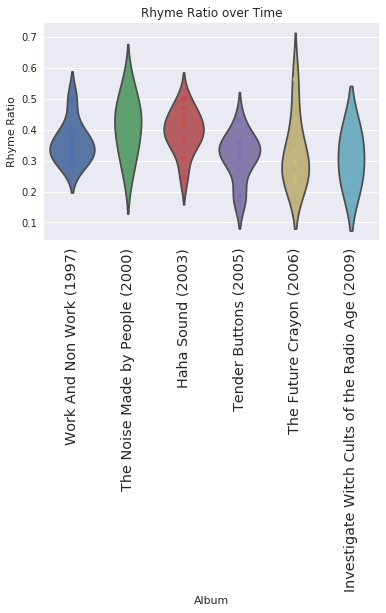

In [92]:
plt.xticks(rotation="vertical", size='large')
ax = sns.stripplot(x=df['Album'], y=df['Rhyme Ratio'])
ax2 = sns.violinplot(x=df['Album'], y=df['Rhyme Ratio'],  inner = None)

ax.set_xlabel("Album")
ax.set_ylabel("Rhyme Ratio")
ax.set_title('Rhyme Ratio over Time')

plt.show()

# sns.lmplot(x="total_bill", y="tip", data=tips,
#            lowess=True);

In [93]:
mean_rhyme_ratios = []
for i in unique_albums: # Get the mean rhyme ratio per unique album
    a = df.loc[df['Album'] == i]
    a = a['Rhyme Ratio']
    mean_rhyme_ratios.append(a.mean())

/home/garrett/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


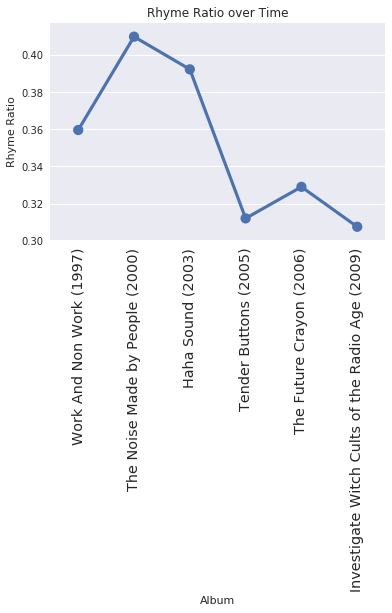

In [94]:
plt.xticks(rotation="vertical", size='large')
ax = sns.pointplot(x=unique_albums, y=mean_rhyme_ratios)
ax.set_xlabel("Album")
ax.set_ylabel("Rhyme Ratio")
ax.set_title('Rhyme Ratio over Time')

plt.show()

In [95]:
unique_rhyme_types = set(rhyme_types)
rhyme_type_tallies = {}
for i in unique_rhyme_types:
    if i != None:
        rhyme_type_tallies[str(i)] = []
    else:
        pass

In [96]:
for rhyme_type in rhyme_type_tallies:
    for i in unique_albums: # Get the mean rhyme ratio per unique album
        a = df.loc[df['Album'] == i]
        a = a['Rhyme Type']
        b = a.str.count(rhyme_type)
        rhyme_type_tallies[rhyme_type].append(int(b.sum()))


In [97]:
lyric_data = pd.DataFrame.from_dict(rhyme_type_tallies)

In [98]:
r = range(len(unique_albums))

totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(lyric_data['alternate rhyme'], lyric_data['couplets'], lyric_data['enclosed rhyme'], lyric_data['limerick'], lyric_data['no rhyme'], lyric_data['rima'], lyric_data['rondeau rhyme'], lyric_data['shakespearean sonnet'])]
alternate_rhyme = [i / j * 100 for i,j in zip(lyric_data['alternate rhyme'], totals)]
couplets = [i / j * 100 for i,j in zip(lyric_data['couplets'], totals)]
enclosed_rhyme = [i / j * 100 for i,j in zip(lyric_data['enclosed rhyme'], totals)]
limerick = [i / j * 100 for i,j in zip(lyric_data['limerick'], totals)]
no_rhyme = [i / j * 100 for i,j in zip(lyric_data['no rhyme'], totals)]
rima = [i / j * 100 for i,j in zip(lyric_data['rima'], totals)]
rondeau_rhyme = [i / j * 100 for i,j in zip(lyric_data['rondeau rhyme'], totals)]
shakespearean_sonnet = [i / j * 100 for i,j in zip(lyric_data['shakespearean sonnet'], totals)]


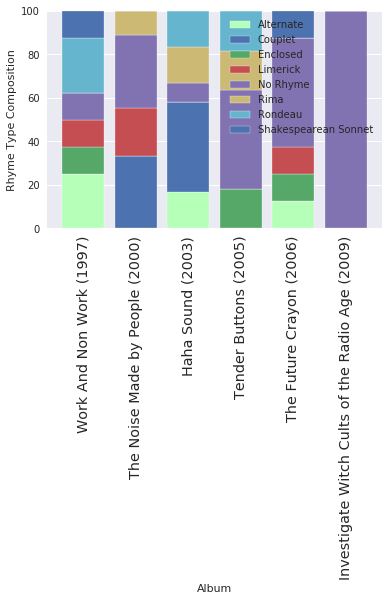

In [99]:
plt.bar(r, alternate_rhyme, color='#b5ffb9', edgecolor='white', label='Alternate')
plt.bar(r, couplets, bottom=alternate_rhyme, edgecolor='white', label='Couplet')
plt.bar(r, enclosed_rhyme, bottom=[i+j for i,j in zip(alternate_rhyme, couplets)], edgecolor='white', label='Enclosed')
plt.bar(r, limerick, bottom=[i+j+k for i,j,k in zip(alternate_rhyme, couplets, enclosed_rhyme)], edgecolor='white', label='Limerick')
plt.bar(r, no_rhyme, bottom=[i+j+k+l for i,j,k,l in zip(alternate_rhyme, couplets, enclosed_rhyme, limerick)], edgecolor='white', label='No Rhyme')
plt.bar(r, rima, bottom=[i+j+k+l+m for i,j,k,l,m in zip(alternate_rhyme, couplets, enclosed_rhyme, limerick, no_rhyme)], edgecolor='white', label='Rima')
plt.bar(r, rondeau_rhyme, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(alternate_rhyme, couplets, enclosed_rhyme, limerick, no_rhyme, rima)], edgecolor='white', label='Rondeau')
plt.bar(r, shakespearean_sonnet, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(alternate_rhyme, couplets, enclosed_rhyme, limerick, no_rhyme, rima, rondeau_rhyme)], edgecolor='white', label='Shakespearean Sonnet')


plt.xticks(r, unique_albums, rotation="vertical", size='large')
plt.xlabel("Album")
plt.ylabel("Rhyme Type Composition")

plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [100]:
includes_lyrics = {'Instrumental':[], 'Lyrics':[]}

In [101]:
for j in unique_albums:
    a = df.loc[df['Album'] == j]
    a = a['Lyrics']
    no_lyrics = 0
    yes_lyrics = 0
    for x in a:
        if x == False or None:
            no_lyrics += 1
        else:
            yes_lyrics += 1
    includes_lyrics['Instrumental'].append(no_lyrics)
    includes_lyrics['Lyrics'].append(yes_lyrics)

In [102]:
includes_lyrics_df = pd.DataFrame.from_dict(includes_lyrics)

In [103]:
totals = [i+j for i,j in zip(includes_lyrics_df['Instrumental'], includes_lyrics_df['Lyrics'])]
instrumental = [i / j * 100 for i,j in zip(includes_lyrics_df['Instrumental'], totals)]
inc_lyrics = [i / j * 100 for i,j in zip(includes_lyrics_df['Lyrics'], totals)]

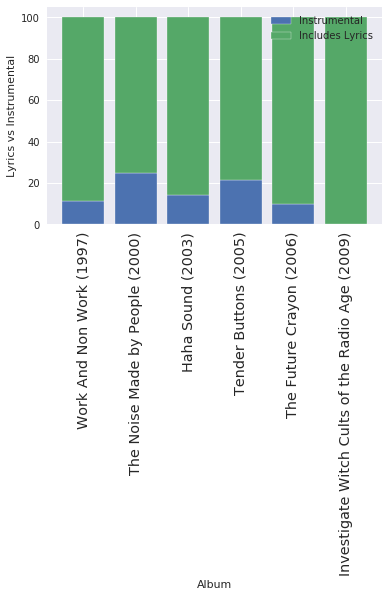

In [104]:
plt.bar(r, instrumental, edgecolor='white', label='Instrumental')
plt.bar(r, inc_lyrics, bottom=instrumental, edgecolor='white', label='Includes Lyrics')



plt.xticks(r, unique_albums, rotation="vertical", size='large')
plt.xlabel("Album")
plt.ylabel("Lyrics vs Instrumental")

plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)

plt.show()